### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

### Interpret best model

In [2]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Compile Coefficients Matrix

In [3]:
coefs = np.abs(log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 15)


,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,Polylobed,Prometaphase,SmallIrregular,UndefinedCondensed
0,0.000000,0.025385,0.000000,0.018403,0.031006,0.008406,0.026601,0.000000,0.029381,0.000000,0.031267,0.055153,3.562197e-02,1.123864e-01,0.000000
1,0.000000,0.009237,0.056111,0.000000,0.063067,0.039966,0.015659,0.060696,0.000000,0.000000,0.000000,0.117289,2.262891e-07,7.554637e-03,0.000000
2,0.000000,0.056550,0.031572,0.000000,0.000000,0.000000,0.019973,0.016457,0.000000,0.000000,0.036646,0.138290,3.304939e-02,5.692475e-02,0.000002
3,0.004420,0.003609,0.072990,0.026500,0.000000,0.014129,0.031532,0.171010,0.009363,0.025323,0.013722,0.063864,1.586951e-02,2.679516e-07,0.000000
4,0.052845,0.055535,0.096728,0.000000,0.000000,0.000000,0.035303,0.000000,0.000000,0.083993,0.026113,0.081990,0.000000e+00,3.257217e-02,0.000000


### Diagrams for interpreting coefficients

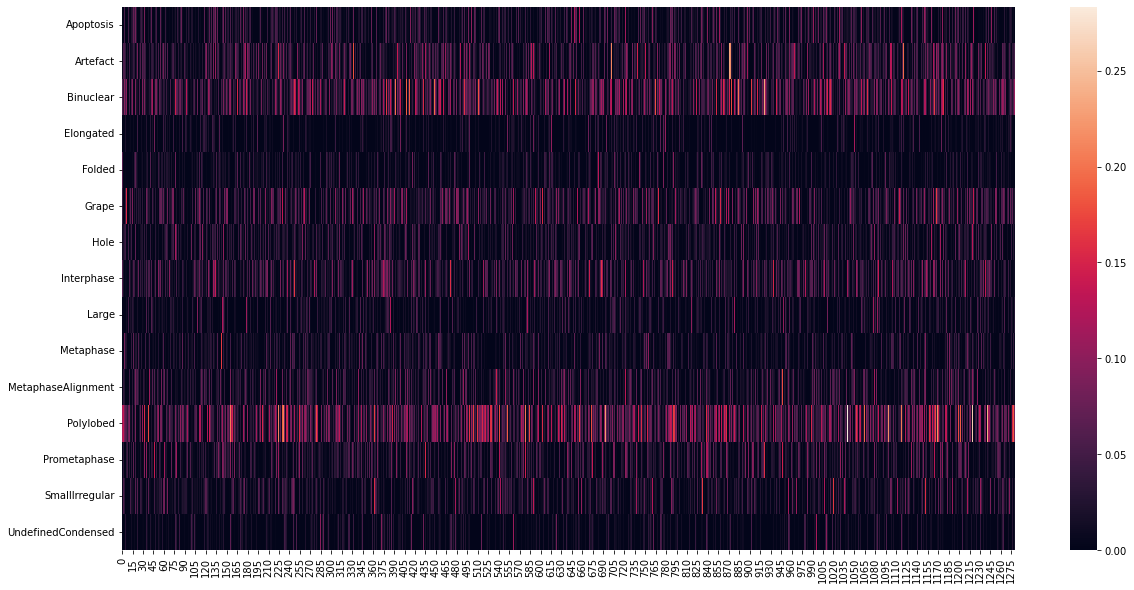

In [4]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/2.ML_phenotypic_classification/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


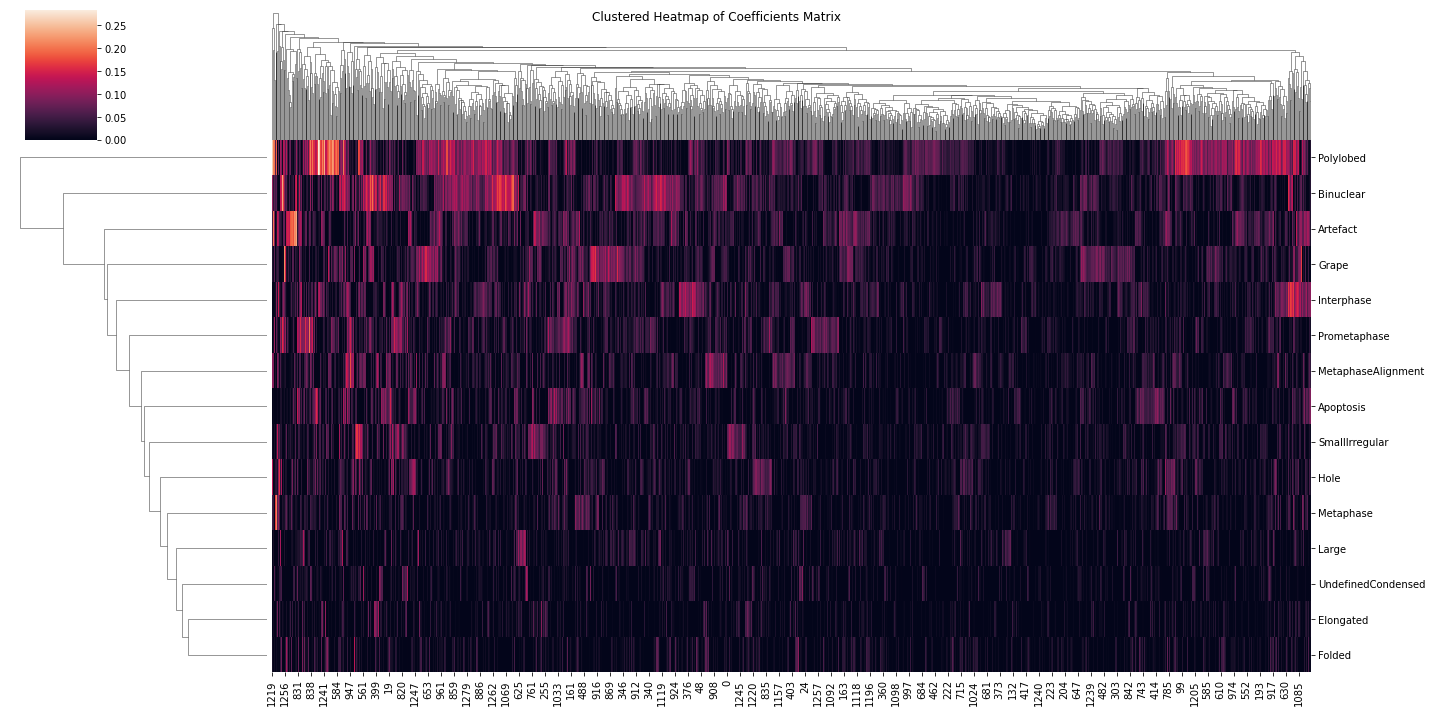

In [5]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

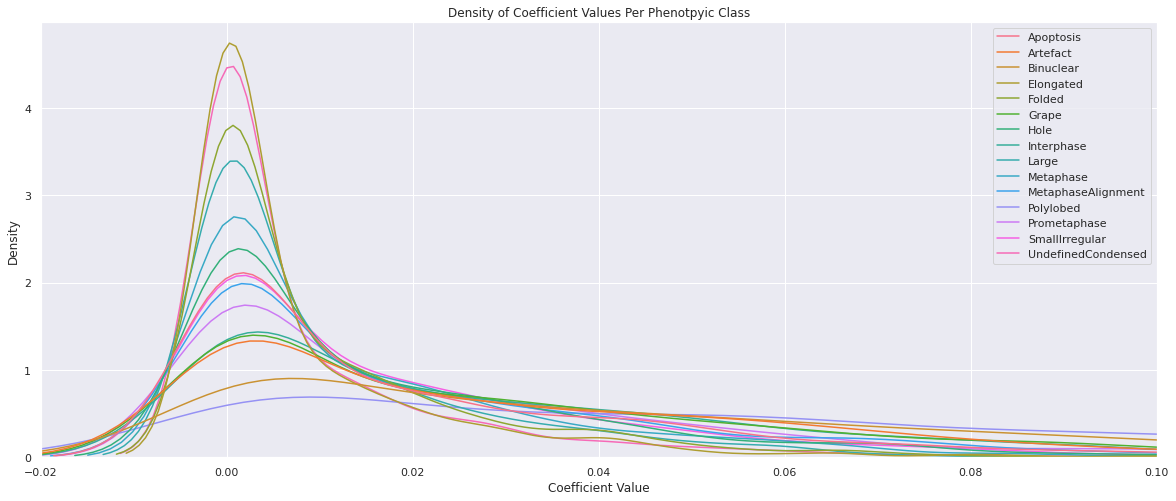

In [6]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

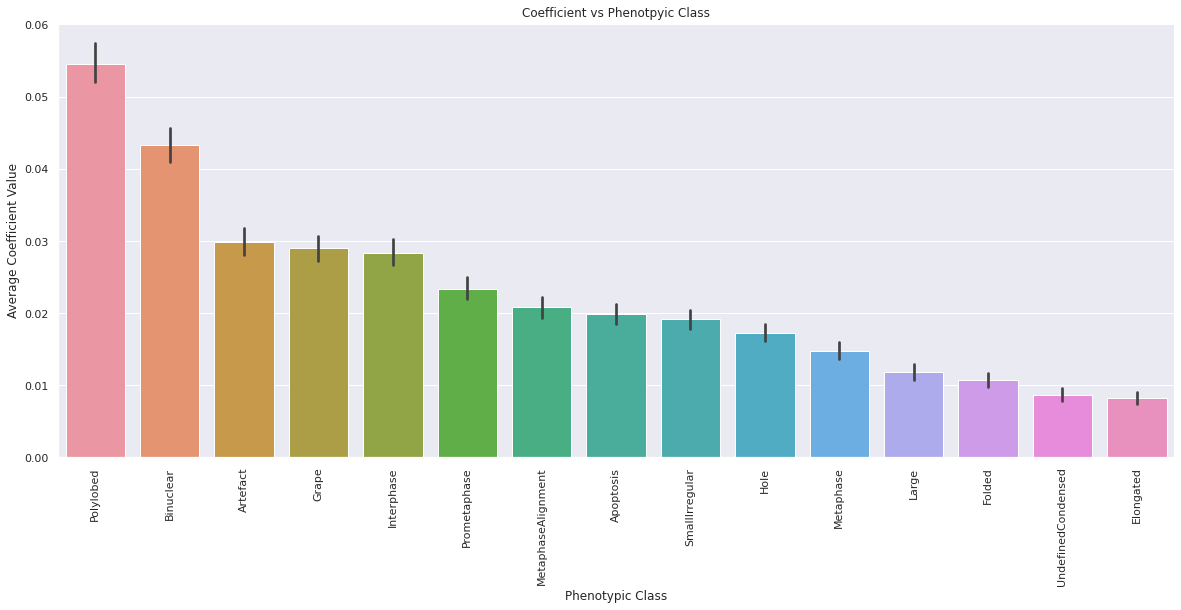

In [7]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

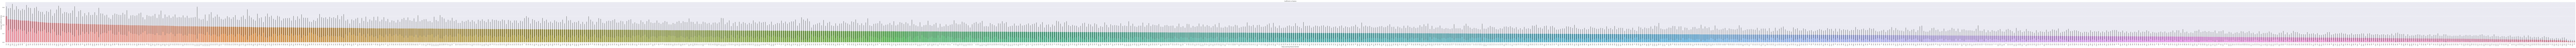

In [8]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)

### Interpret shuffled baseline model

In [9]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

shuffled_baseline_log_reg_model_path = pathlib.Path(f"{results_dir}/1.shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

### Compile Coefficients Matrix

In [10]:
coefs = np.abs(shuffled_baseline_log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = shuffled_baseline_log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 15)


,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,Polylobed,Prometaphase,SmallIrregular,UndefinedCondensed
0,1.533210e-02,0.035551,0.070693,0.061194,0.045569,7.894860e-02,0.028784,0.053231,0.005548,1.217560e-02,0.041230,0.101564,6.525327e-02,0.032329,0.000000
1,2.414406e-02,0.163878,0.076289,0.039430,0.000000,6.359182e-02,0.005901,0.129860,0.000000,4.246644e-02,0.012090,0.087702,1.241177e-01,0.073172,0.038624
2,5.800684e-07,0.089064,0.051218,0.004629,0.007668,3.893549e-07,0.036156,0.042250,0.007488,2.623435e-08,0.018592,0.063941,3.111300e-03,0.063955,0.027728
3,3.276295e-02,0.002638,0.062399,0.000000,0.000000,5.164034e-02,0.084967,0.024429,0.017168,1.719367e-02,0.056429,0.054024,6.431995e-07,0.078915,0.000000
4,0.000000e+00,0.056746,0.073113,0.015840,0.017437,8.042680e-02,0.000000,0.024661,0.000000,6.487013e-02,0.101390,0.029042,2.395137e-01,0.013890,0.037201


### Diagrams for interpreting coefficients

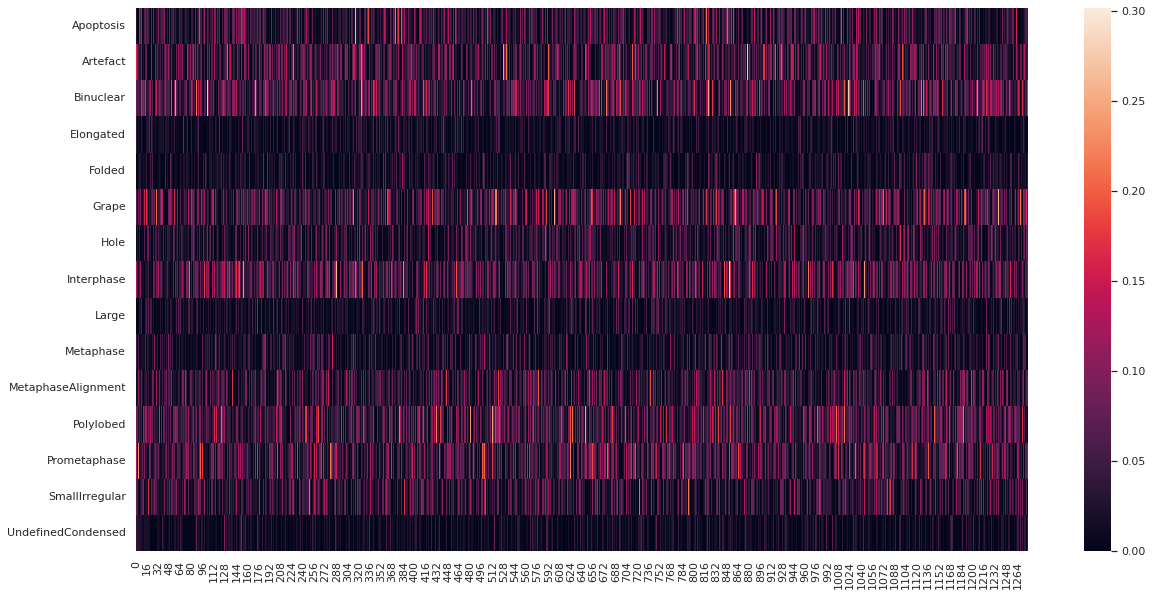

In [11]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/2.ML_phenotypic_classification/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


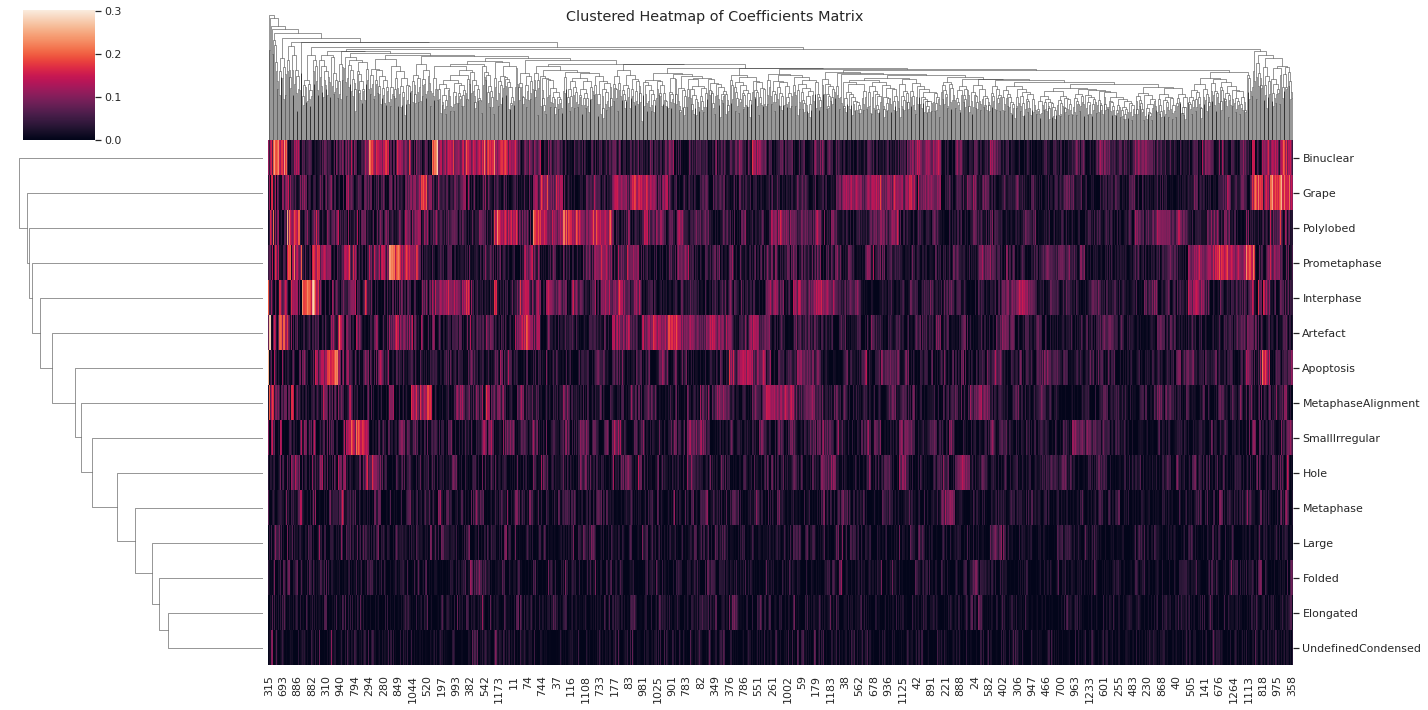

In [12]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

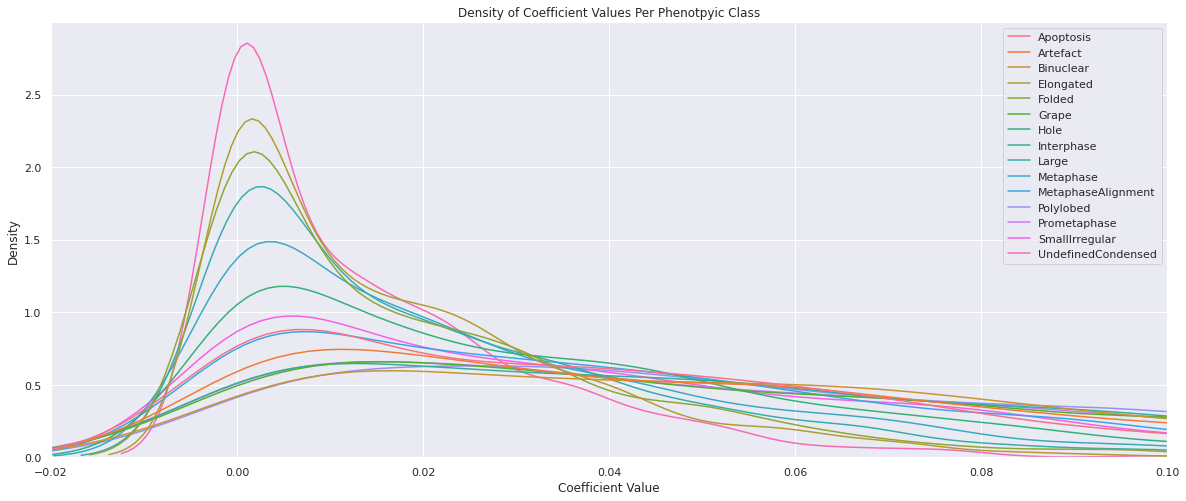

In [13]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

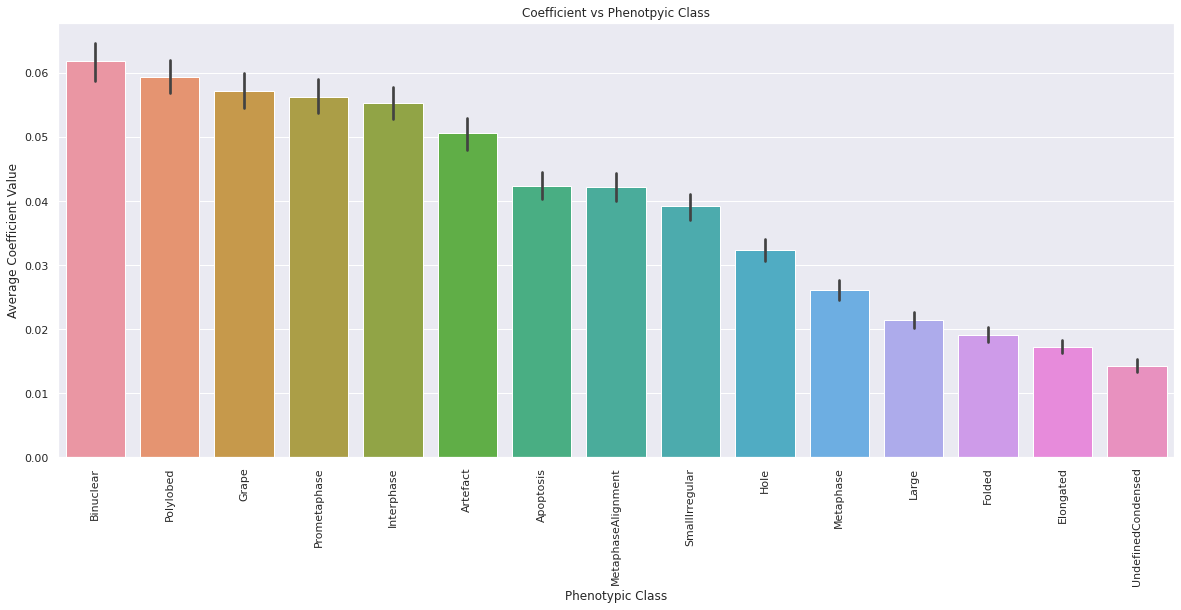

In [14]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

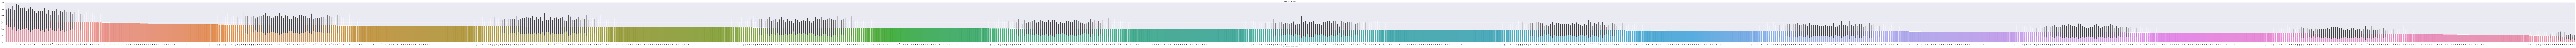

In [15]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)